### 1. For the boston dataset given in HW2, create a heatmap with all the features - 1 point

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LabelEncoder_X= LabelEncoder()

In [3]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
data= load_boston()

(506, 13)


In [4]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(data.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [8]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston['MEDV'] = data.target

<AxesSubplot:>

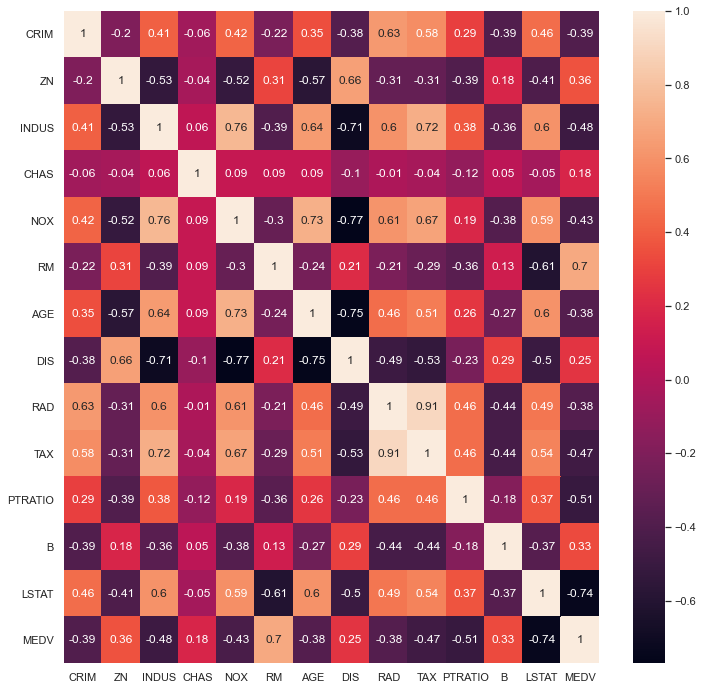

In [10]:
sns.set(rc={'figure.figsize':(12,12)})
corr_matrix = boston.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

### 2. Apply feature selection on the dataset. Try to find the top k features which improves the score in the next questions - 1 point each

In [11]:
#observation: RM has a strong positive corelation to our target value MEDV
#observation: LSTAT has a strong negative corelation to our target value MEDV

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### 3. Apply Linear regression and Ridge regression and plot the coefficient for each feature. Try different aplha values as well and comment what do you observe. -3 points

Use different marker for each model if plotting in same figure.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [15]:
#training set Linear regression
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


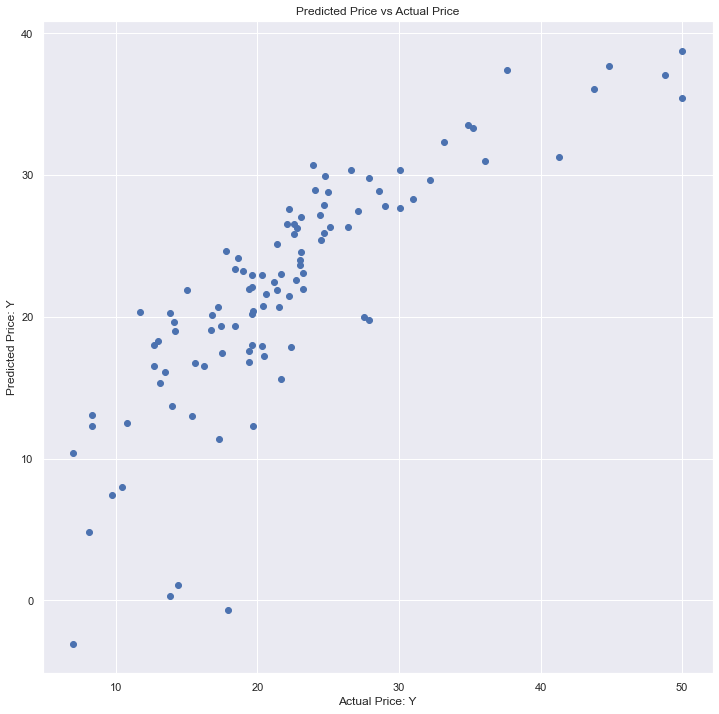

In [16]:
plt.scatter(Y_test,y_test_predict)
plt.xlabel("Actual Price: Y")
plt.ylabel("Predicted Price: Y")
plt.title("Predicted Price vs Actual Price")
plt.show()

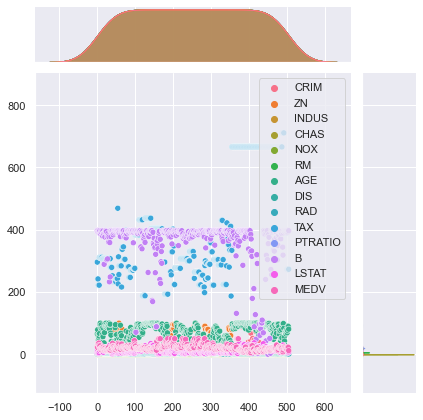

In [17]:
sns.jointplot(data=boston)

In [18]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=2) #a higher alpha value restricts the coefficients
ridge_model.fit(X_train,Y_train)

Ridge(alpha=2)

In [19]:
#training set ridge regression
y_train_predict = ridge_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#testing set
y_test_predict = ridge_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Training set
RMSE is 5.637266793523255
R2 score is 0.6300564738340574


Testing set
RMSE is 5.147364370697948
R2 score is 0.6615908703555932


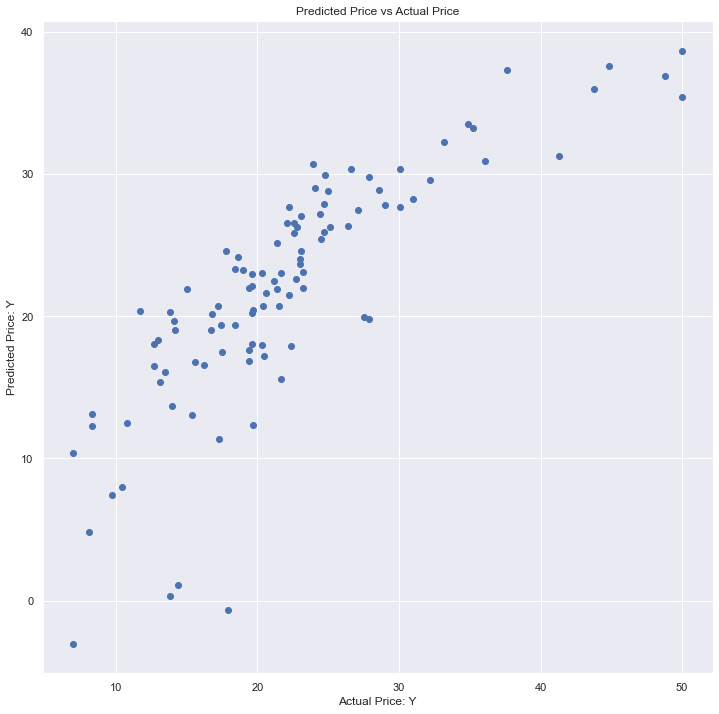

In [20]:
plt.scatter(Y_test,y_test_predict)
plt.xlabel("Actual Price: Y")
plt.ylabel("Predicted Price: Y")
plt.title("Predicted Price vs Actual Price")
plt.show()

### 4. Use the HCC.csv file. Split the data into 70:30. Apply Ridge and lasso regression on the data to predict alive or dead. -5 points

In this question you are expected to figure out the difference between the two regularization technique as well as when to use which. Comment your findings. Try plotting coefficents as well for better understanding.

In [21]:
hcc= pd.read_csv("HCC.csv")

In [22]:
hcc

,Unnamed: 0,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
0,0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,...,2.1,34.0,41,183.0,150.0,7.1,0.70,1.0,3.5,1
1,2,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.4,58.0,68,202.0,109.0,7.0,2.10,5.0,13.0,1
2,3,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,...,0.4,16.0,64,94.0,174.0,8.1,1.11,2.0,15.7,0
3,4,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.7,147.0,306,173.0,109.0,6.9,1.80,1.0,9.0,1
4,5,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,...,3.5,91.0,122,242.0,396.0,5.6,0.90,1.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,160,0,0.0,1,0.0,0.0,1.0,1,0.0,0.0,...,0.5,35.0,40,449.0,109.0,7.6,0.70,5.0,3.0,1
152,161,0,1.0,0,0.0,0.0,0.0,1,0.0,0.0,...,3.6,50.0,91,147.0,280.0,6.7,0.70,1.0,2.2,0
153,162,1,0.0,1,0.0,0.0,0.0,1,1.0,1.0,...,0.6,53.0,52,164.0,181.0,7.5,1.46,5.0,18.6,1
154,163,1,0.0,1,1.0,1.0,1.0,1,0.0,0.0,...,1.1,50.0,60,320.0,170.0,8.4,0.74,5.0,18.0,0


In [23]:
print(hcc.keys())

Index(['Unnamed: 0', '1.Gen', '2.Sym', '3.Alc', '4.HepB', '6.HepB', '7.HepC',
       '8.Cir', '11.Dia', '12.Obe', '13.Hem', '14.Art', '15.CRen', '16.HIV',
       '17.Non', '19.Spl', '20.PHyp', '21.Thr', '22.LMet', '23.Rad',
       '24.Agedia', '27.Sta', '28.Encdeg', '29.Ascdeg', ' 30.IntNorRat',
       ' 31.Alp', ' 32.Hae', ' 33.MCorVol', ' 34.Leu', '35.Plat', '36.Alb',
       '37.Bil', '38.Ala', '39.Aspa', '40.Gam', '41.Alk', '42.Prot', '43.Crea',
       '44.NNod', '45.dnod', 'Class'],
      dtype='object')


In [24]:
print(hcc.describe())

       Unnamed: 0       1.Gen       2.Sym       3.Alc      4.HepB     6.HepB  \
count  156.000000  156.000000  156.000000  156.000000  156.000000  156.00000   
mean    82.435897    0.820513    0.660256    0.762821    0.096154    0.24359   
std     47.775170    0.384996    0.475147    0.426723    0.295752    0.43063   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%     40.750000    1.000000    0.000000    1.000000    0.000000    0.00000   
50%     83.500000    1.000000    1.000000    1.000000    0.000000    0.00000   
75%    123.250000    1.000000    1.000000    1.000000    0.000000    0.00000   
max    164.000000    1.000000    1.000000    1.000000    1.000000    1.00000   

           7.HepC       8.Cir      11.Dia      12.Obe  ...      37.Bil  \
count  156.000000  156.000000  156.000000  156.000000  ...  156.000000   
mean     0.198718    0.923077    0.333333    0.128205  ...    2.916948   
std      0.400320    0.267328    0.472923    0.335395  ..

<AxesSubplot:>

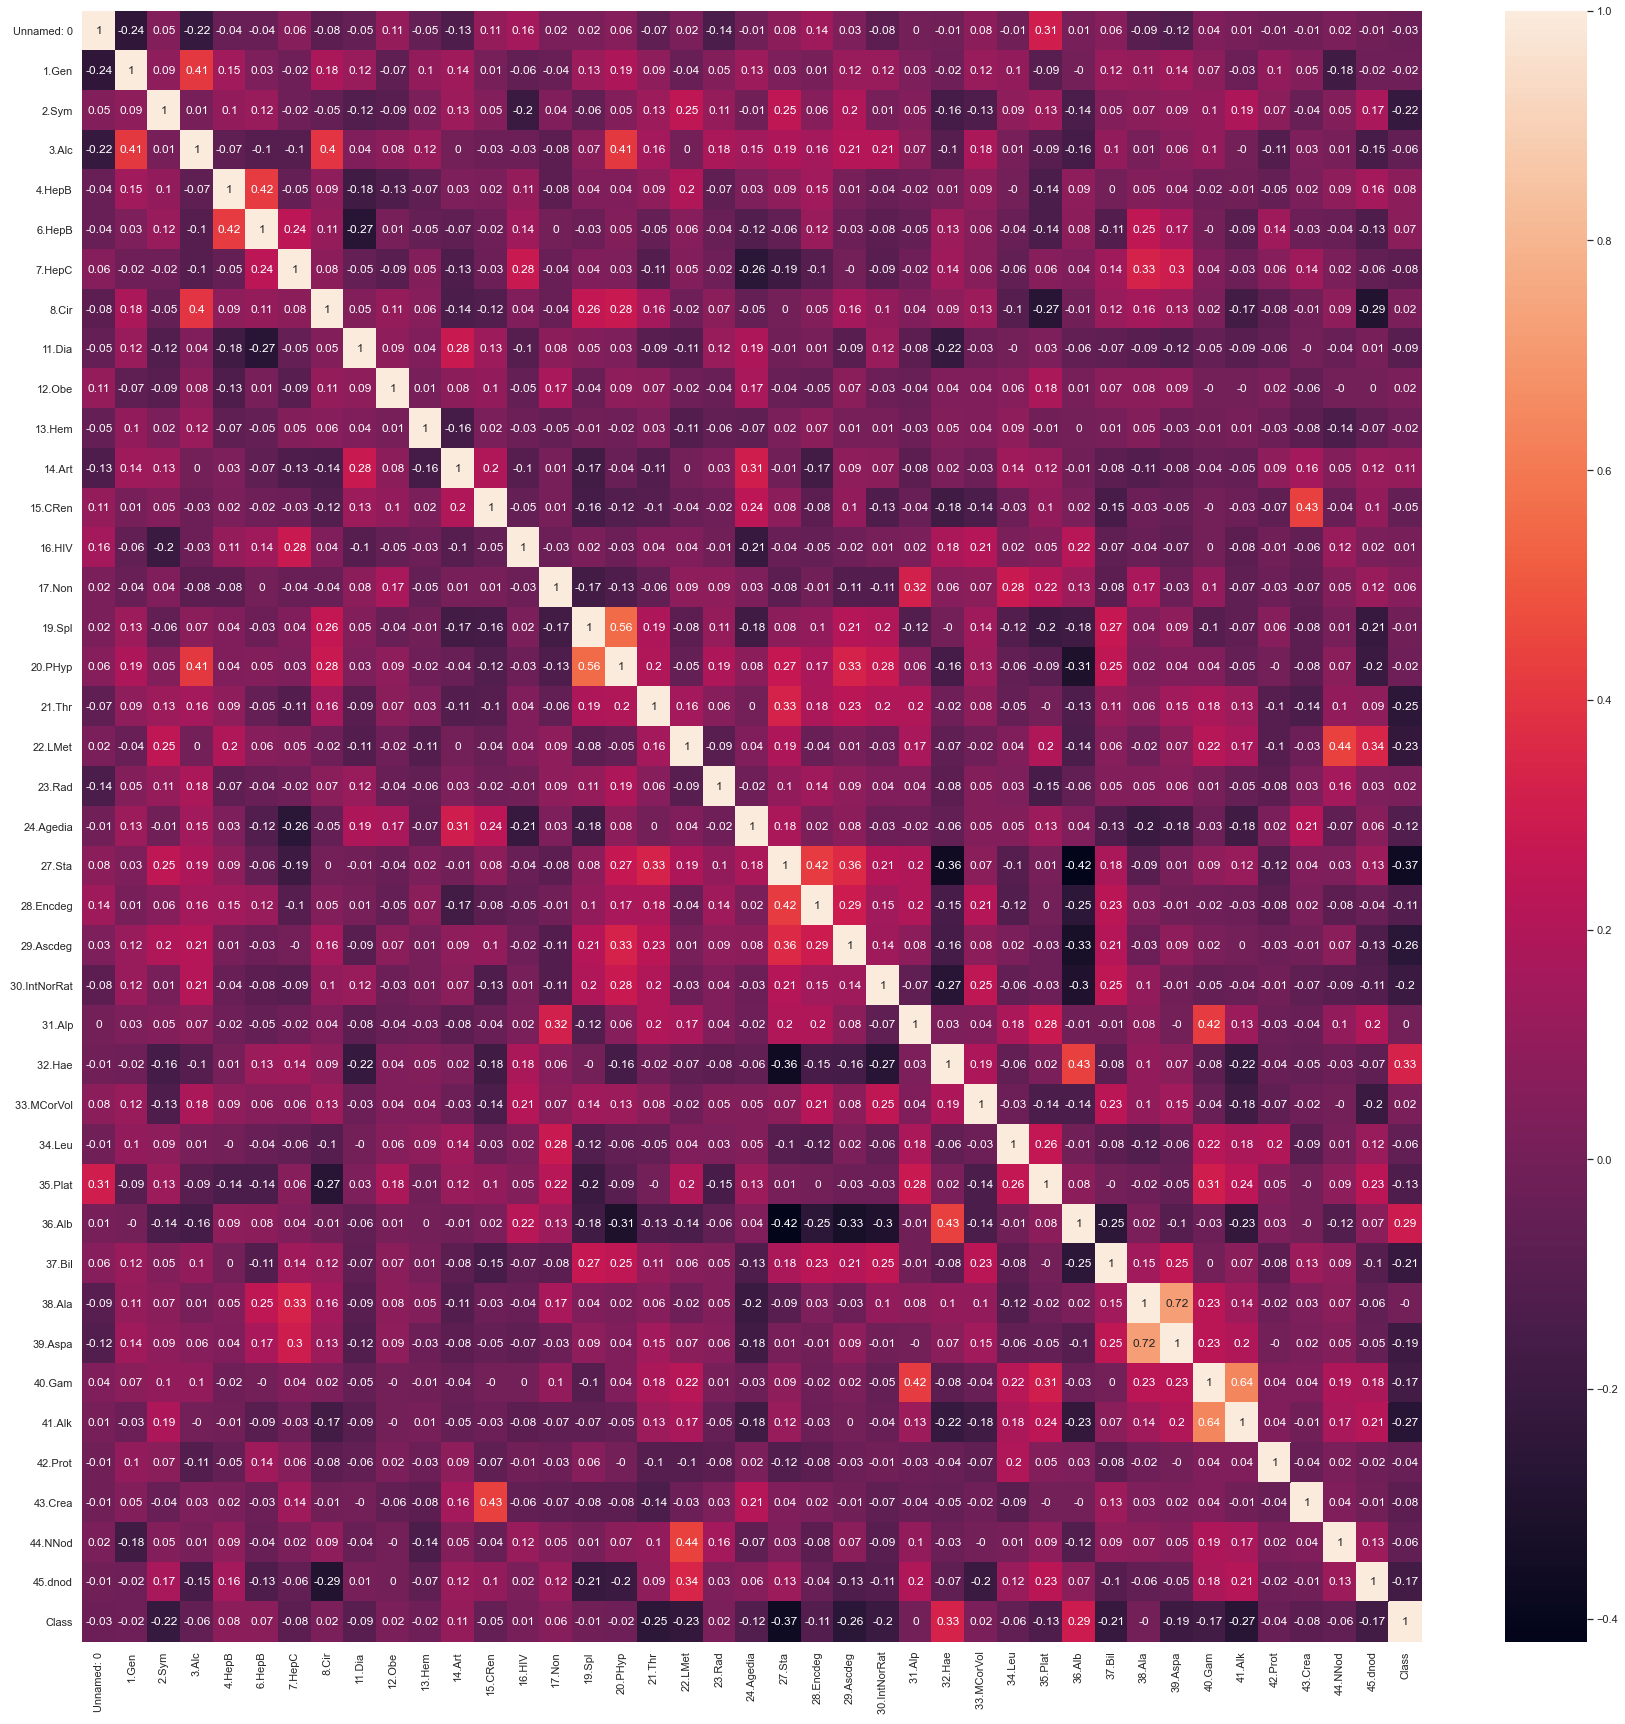

In [25]:
sns.set(rc={'figure.figsize':(30,30)})
corr_matrix = hcc.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

In [26]:
X = hcc.drop('Class', axis = 1)
Y = hcc['Class']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(109, 40)
(47, 40)
(109,)
(47,)


In [28]:
ridge_model = Ridge(alpha=1) #a higher alpha value restricts the coefficients
ridge_model.fit(X_train,Y_train)
y_train_predict = ridge_model.predict(X_train) #predictions on training data
Y_pred = ridge_model.predict(X_test)

In [29]:
#training set
y_train_predict = ridge_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("Training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")
#testing set
y_test_predict = ridge_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("Testing set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

print('Intercept: ',ridge_model.intercept_) # This gives us the intercept term
print('Coefficients: \n',ridge_model.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)


Training set
MSE is 0.10589442797997864
R2 score is 0.5487332500609302


Testing set
MSE is 0.2948760113015038
R2 score is -0.24785653058433255


Intercept:  0.9884441359338572
Coefficients: 
 [ 3.36275663e-04  4.60456879e-02 -1.77280636e-02  6.29624708e-02
  2.28625291e-01 -9.96640111e-02 -1.18608172e-01 -1.24845144e-01
 -2.02242848e-01 -1.72600177e-02  5.67965766e-02  1.92798632e-01
  8.97262080e-02 -6.61332909e-02 -2.34372409e-02  9.11627247e-02
  2.49185324e-01 -1.67719194e-01 -1.71500827e-02  1.73065258e-01
 -3.47429029e-03 -1.16409200e-01 -9.85086046e-03 -1.65557019e-01
 -1.53600736e-01 -1.29031164e-07  2.78071315e-02  2.16731014e-03
 -2.51366812e-05 -1.30168304e-07 -2.12005829e-02 -1.06202206e-02
  1.26251686e-03 -1.68356444e-03 -8.91738974e-05  8.38894479e-05
  6.07123551e-03 -2.79748526e-02 -2.71514443e-04 -2.56269637e-02]


In [30]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1) #a higher alpha value restricts the coefficients
ls.fit(X_train,Y_train)
y_train_predict = ls.predict(X_train) #predictions on training data
Y_pred = ls.predict(X_test)


In [31]:
#training set lasso regression
y_train_predict = ls.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("Training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")
#testing set
y_test_predict = ls.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("Testing set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")



print('Intercept: ',ls.intercept_) # This gives us the intercept term
print('Coefficients: \n',ls.coef_) # This gives us the coefficients 

Training set
MSE is 0.16418916426226499
R2 score is 0.3003115277618469


Testing set
MSE is 0.4545557717111714
R2 score is -0.9235894630459331


Intercept:  0.4044955730378223
Coefficients: 
 [ 6.90615362e-05  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -2.28112499e-03 -1.86808457e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.53368600e-06  4.70772814e-02 -0.00000000e+00
 -9.52269911e-06 -3.45472315e-07  0.00000000e+00 -1.35252549e-02
  1.23461300e-03 -1.53515517e-03 -1.09938681e-04  0.00000000e+00
  6.93089562e-03 -0.00000000e+00  0.00000000e+00 -1.16526689e-02]


In [32]:
X = pd.DataFrame(np.c_[hcc['27.Sta'], hcc[' 32.Hae']], columns = ['27.Sta',' 32.Hae']) #here I focus on just two coeficients to try to improve the score
Y = hcc['Class']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(109, 2)
(47, 2)
(109,)
(47,)


In [34]:
ridge_model = Ridge(alpha=1) #a higher alpha value restricts the coefficients
ridge_model.fit(X_train,Y_train)
y_train_predict = ridge_model.predict(X_train) #predictions on training data
Y_pred = ridge_model.predict(X_test)

In [35]:
#training set ridge regression
y_train_predict = ridge_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("Training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")
#testing set
y_test_predict = ridge_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("Testing set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

print('Intercept: ',ridge_model.intercept_) # This gives us the intercept term
print('Coefficients: \n',ridge_model.coef_) # This gives us the coefficients 

Training set
MSE is 0.1880116739976412
R2 score is 0.19879243229340893


Testing set
MSE is 0.20704193901314108
R2 score is 0.12383976383136319


Intercept:  0.18748076183022944
Coefficients: 
 [-0.13364714  0.046481  ]


In [36]:
ls = Lasso(alpha=0.1) #a higher alpha value restricts the coefficients
ls.fit(X_train,Y_train)
y_train_predict = ls.predict(X_train) #predictions on training data
Y_pred = ls.predict(X_test)

In [37]:
#training set
y_train_predict = ls.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("Training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")
#testing set
y_test_predict = ls.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("Testing set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")



print('Intercept: ',ls.intercept_) # This gives us the intercept term
print('Coefficients: \n',ls.coef_) # This gives us the coefficients 

#the regressions do not work well for this clasification problem 

Training set
MSE is 0.19548013795462255
R2 score is 0.16696573922565594


Testing set
MSE is 0.20680131208701794
R2 score is 0.12485804904171949


Intercept:  0.22050109218561448
Coefficients: 
 [-0.06822801  0.03805342]
